In [ ]:
# Tweet Analysis
1. Based on the sentiments data, BBC and Fox had the most positive tweets out of the 5 media outlets.

2. CBS and CNN have the most negative tweets. Although, New York Times is slightly in the negative, it would be considered neutral.

3. There were a wide variety of sentiments across tweets, based on the scatter plot graph, likely because the news can go any direction way.

In [5]:
# dependencies
import tweepy
import json
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
plt.style.use('ggplot')

In [6]:
# config# confi 
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [7]:
# tweepy setup
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
# VADER setup
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
# define users, collect sentiments
target_users = ["@bbc", "@cbsnews", "@cnn", "@foxnews", "@nytimes"]
sentiments = []

In [13]:
#collect 100 tweets for each user
for target in target_users:
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    oldest_tweet=None
    
    counter=1
    
    for x in range (1, 6):
        
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
        
        for tweet in public_tweets:
            
#             print("Tweet %s: %s" % (counter, tweet["text"]))
    
            #collect results for dataframe
            tweet_text=tweet["text"]
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            
            oldest_tweet = tweet['id'] - 1
        
            tweet_time=[]
            tweet_date=[]
            raw_time = tweet["created_at"]
            tweet_time.append(raw_time)
            for raw_time in tweet_time:
                tweet_date=datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
            
            sentiments.append({"User": target,
                               "Date": tweet_date,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,
                               "Tweet Text": tweet_text})
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            counter += 1

In [14]:
# create first dataframe for scatter plot, export info to csv# creat 
news_df = pd.DataFrame.from_dict(sentiments).round(3)
news_df.head()
news_df.to_csv("news_mood_data.csv")

In [17]:
#fill in dataframe
bbc_df = news_df.loc[news_df["User"] == "@bbc"]
cbs_df = news_df.loc[news_df["User"] == "@cbsnews"]
cnn_df = news_df.loc[news_df["User"] == "@cnn"]
fox_df = news_df.loc[news_df["User"] == "@foxnews"]
nyt_df = news_df.loc[news_df["User"] == "@nytimes"]

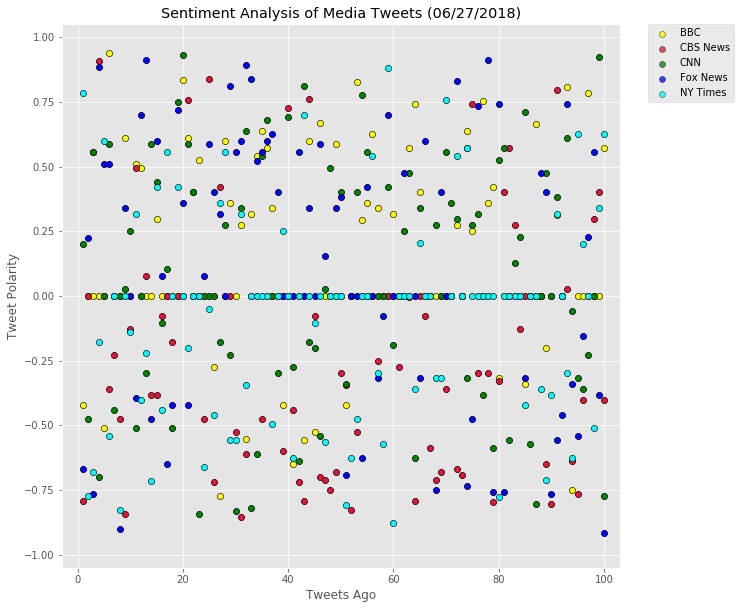

In [22]:
#date for graph titles
date = datetime.now()
date = date.strftime("%m/%d/%Y")

#scatter plot creation and save image
plt.figure(figsize=(10,10))
plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound"], c="yellow", alpha=0.75, edgecolors="k", label="BBC")
plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound"], c="crimson", alpha=0.75, edgecolors="k", label="CBS News")
plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound"], c="green", alpha=0.75, edgecolors="k", label="CNN")
plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"], c="blue", alpha=0.75, edgecolors="k", label="Fox News")
plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound"], c="cyan", alpha=0.75, edgecolors="k", label="NY Times")
plt.xlim(-3, 103)
plt.ylim(-1.05, 1.05)
plt.title(f"Sentiment Analysis of Media Tweets ({date})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.savefig("sentiment_analysis.png")

In [23]:
# collect means of compound results for bar graph
bbc_mean=np.mean(bbc_df["Compound"])
cbs_mean=np.mean(cbs_df["Compound"])
cnn_mean=np.mean(cnn_df["Compound"])
fox_mean=np.mean(fox_df["Compound"])
nyt_mean=np.mean(nyt_df["Compound"])

In [26]:
# create dataframe for bar graph
bar_df=pd.DataFrame({"Users": ["BBC", "CBS", "CNN", "FOX", "NYT"],
        "Mean Sentiments": [bbc_mean, cbs_mean, cnn_mean, fox_mean, nyt_mean]}).round(3)
bar_df

,Mean Sentiments,Users
0,0.139,BBC
1,-0.155,CBS
2,0.054,CNN
3,0.096,FOX
4,-0.074,NYT


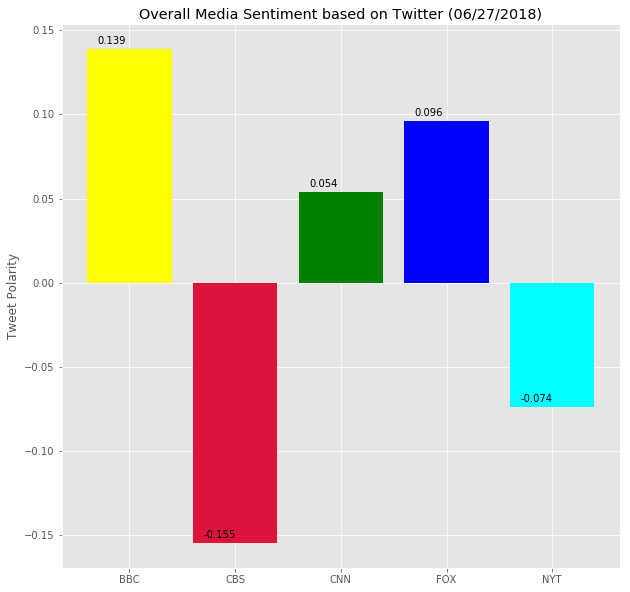

In [28]:
# create bar graph and save image
plt.figure(figsize=(10,10))
plt.bar(bar_df["Users"], bar_df["Mean Sentiments"], color=["yellow", "crimson", "green", "blue", "cyan"])
plt.title(f"Overall Media Sentiment based on Twitter ({date})")
plt.ylabel("Tweet Polarity")
for i, v in enumerate(bar_df["Mean Sentiments"]):
    plt.text(i-.3, v+.003, str(v).format(), color='black')
plt.show()
plt.savefig("sentiment_summary.png")